In [1]:
import requests
from bs4 import BeautifulSoup
import re 
import pandas as pd 
import json
import time

In [2]:
def get_data_frames():
    '''
    This scrapes the site www.the-numbers.com for the years of 2009 until 2019
    '''
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    years = range(2009,2020)
    dfs = []
    for year in years:
        url = f'https://www.the-numbers.com/box-office-records/worldwide/all-movies/cumulative/released-in-{year}'
        time.sleep(2)
        html = requests.get(url, headers=headers) # avoid the 403
        yearly_df = pd.read_html(html.text)[1]
        yearly_df.dropna(inplace=True)
        yearly_df['year'] = year
        dfs.append(yearly_df)
    return dfs

frames = get_data_frames()
overall_df = pd.concat(frames, axis=0)

In [4]:
def clean_movie_names(dataframe):
    '''
    The movie names were coming back with some no ascii characters so this function cleans up 
    those characters and adds an apostrophe where those characters were located
    '''
    overall_df['clean_movie'] = overall_df.Movie.map(lambda x: x.replace("â", "'"))
    return overall_df

In [5]:
overall_df = clean_movie_names(overall_df)

In [257]:
overall_df.to_csv('Overall_DataFrame')

In [10]:
def get_ratings(dataframe):
    '''
    This calls an api from omdbapi.com and returns a dictionary of values for the specified movies
    that were in the yearly gross profits from get_data_frames
    '''
    movie_rating_list = []
    for api_req,year in zip(dataframe.clean_movie, dataframe.year): 
        movie_name = f"http://www.omdbapi.com/?t={api_req}&y={year}&apikey=b213361e"
        try:
            movie_ratings = requests.get(movie_name).json()
            movie_rating_list.append(movie_ratings)
        except ValueError:
            print('Name did not work')
    return pd.DataFrame(movie_rating_list)


In [11]:
ratings_df = get_ratings(overall_df)

Name did not work


In [12]:
ratings_df

,Actors,Awards,BoxOffice,Country,DVD,Director,Error,Genre,Language,Metascore,...,Runtime,Title,Type,Website,Writer,Year,imdbID,imdbRating,imdbVotes,totalSeasons
0,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Won 3 Oscars. Another 85 wins & 128 nominations.,"$749,700,000",USA,22 Apr 2010,James Cameron,NaN,"Action, Adventure, Fantasy, Sci-Fi","English, Spanish",83,...,162 min,Avatar,movie,http://www.avatarmovie.com/,James Cameron,2009,tt0499549,7.8,"1,055,104",NaN
1,"Daniel Radcliffe, Michael Gambon, Dave Legeno,...",Nominated for 1 Oscar. Another 8 wins & 35 nom...,"$301,920,409","UK, USA",08 Dec 2009,David Yates,NaN,"Action, Adventure, Family, Fantasy, Mystery",English,78,...,153 min,Harry Potter and the Half-Blood Prince,movie,http://www.harrypotter.com/,"Steve Kloves (screenplay), J.K. Rowling (novel)",2009,tt0417741,7.6,"425,184",NaN
2,"Eunice Cho, Karen Disher, Harrison Fahn, Maile...",3 wins & 13 nominations.,"$124,605,432",USA,27 Oct 2009,"Carlos Saldanha, Mike Thurmeier(co-director)",NaN,"Animation, Adventure, Comedy, Family",English,50,...,94 min,Ice Age: Dawn of the Dinosaurs,movie,http://www.iceagemovie.com/,"Michael Berg (screenplay by), Peter Ackerman (...",2009,tt1080016,6.9,"206,824",NaN
3,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...",Nominated for 1 Oscar. Another 15 wins & 27 no...,"$402,076,689",USA,20 Oct 2009,Michael Bay,NaN,"Action, Adventure, Sci-Fi","English, Spanish",35,...,150 min,Transformers: Revenge of the Fallen,movie,http://www.TransformersMovie.com/,"Ehren Kruger, Roberto Orci, Alex Kurtzman",2009,tt1055369,6.0,"367,639",NaN
4,"John Cusack, Amanda Peet, Chiwetel Ejiofor, Th...",5 wins & 21 nominations.,"$166,112,167",USA,02 Mar 2010,Roland Emmerich,NaN,"Action, Adventure, Sci-Fi","English, French, Tibetan, Mandarin, Russian, H...",49,...,158 min,2012,movie,http://www.whowillsurvive2012.com/,"Roland Emmerich, Harald Kloser",2009,tt1190080,5.8,"331,033",NaN
5,"Edward Asner, Christopher Plummer, Jordan Naga...",Won 2 Oscars. Another 74 wins & 81 nominations.,"$292,979,556",USA,10 Nov 2009,"Pete Docter, Bob Peterson(co-director)",NaN,"Animation, Adventure, Comedy, Family",English,88,...,96 min,Up,movie,http://Disney.com/UP,"Pete Docter (story by), Bob Peterson (story by...",2009,tt1049413,8.2,"858,815",NaN
6,"Kristen Stewart, Christina Jastrzembska, Rober...",20 wins & 24 nominations.,"$296,593,070",USA,20 Mar 2010,Chris Weitz,NaN,"Adventure, Drama, Fantasy, Mystery, Romance","English, Italian",44,...,130 min,The Twilight Saga: New Moon,movie,http://www.newmoonthemovie.com/,"Melissa Rosenberg (screenplay), Stephenie Meye...",2009,tt1259571,4.7,"250,739",NaN
7,"Robert Downey Jr., Jude Law, Rachel McAdams, M...",Nominated for 2 Oscars. Another 10 wins & 27 n...,"$208,711,166","USA, Germany, UK",30 Mar 2010,Guy Ritchie,NaN,"Action, Adventure, Crime, Mystery, Thriller","English, French",57,...,128 min,Sherlock Holmes,movie,http://sherlock-holmes-movie.warnerbros.com/,"Michael Robert Johnson (screenplay), Anthony P...",2009,tt0988045,7.6,"553,313",NaN
8,"Alexia Aleman, Blaine Moir, Robin Sydney, Step...",N/A,N/A,USA,N/A,"Josh Martinez, Joshua Martinez",NaN,"Short, Drama, Fantasy, Sci-Fi",English,N/A,...,3 min,Angels,movie,N/A,"Alexia Aleman (story), Alexia Aleman",2009,tt1521673,8.4,5,NaN
9,"Bradley Cooper, Ed Helms, Zach Galifianakis, J...",Won 1 Golden Globe. Another 12 wins & 25 nomin...,"$277,313,371","USA, Germany",15 Dec 2009,Todd Phillips,NaN,Comedy,English,73,...,100 min,The Hangover,movie,http://hangovermovie.warnerbros.com/,"Jon Lucas, Scott Moore",2009,tt1119646,7.7,"676,552",NaN


In [258]:
ratings_df.to_csv('Ratings_DataFrame')

In [20]:
def get_tomato_score(row):
    try:
        tomato_val = [x.get('Value') for x in row if x.get('Source') == 'Rotten Tomatoes'][0]
        tomato_val = tomato_val.replace('%','')
        return int(tomato_val)
    except:
        return (None)

In [15]:
def imdb_clean(row):
    try:
        return float(row) * 10
    except:
        return(None)

In [16]:
def get_meta_score(row):
    try:
        return int(row)
    except:
        return(None)

In [21]:
ratings_df['Rotten_Score'] = ratings_df.Ratings.map(get_tomato_score)
ratings_df['Metacritic_Score'] = ratings_df.Metascore.map(get_meta_score)
ratings_df['Imdb_Score'] = ratings_df.imdbRating.map(imdb_clean)

In [78]:
joining_df = ratings_df[['Title','Rotten_Score','Metacritic_Score','Imdb_Score']].set_index('Title')

In [80]:
joined_df = overall_df[['Worldwide Box Office','Domestic Box Office','International Box Office',
                               'DomesticShare','year','clean_movie']].set_index('clean_movie')

In [81]:
final_df = joined_df.join(joining_df,on='clean_movie',how='inner')

In [82]:
final_df = final_df.dropna()

In [83]:
final_df

,Worldwide Box Office,Domestic Box Office,International Box Office,DomesticShare,year,Rotten_Score,Metacritic_Score,Imdb_Score
clean_movie,,,,,,,,
Avatar,"$2,789,705,275","$760,507,625","$2,029,197,650",27.26%,2009,82.0,83.0,78.0
Harry Potter and the Half-Blood Prince,"$935,213,767","$302,089,278","$633,124,489",32.30%,2009,83.0,78.0,76.0
Ice Age: Dawn of the Dinosaurs,"$859,701,857","$196,573,705","$663,128,152",22.87%,2009,46.0,50.0,69.0
Transformers: Revenge of the Fallen,"$836,519,699","$402,111,870","$434,407,829",48.07%,2009,20.0,35.0,60.0
2012,"$757,677,748","$166,112,167","$591,565,581",21.92%,2009,39.0,49.0,58.0
Up,"$731,463,377","$293,004,164","$438,459,213",40.06%,2009,98.0,88.0,82.0
The Twilight Saga: New Moon,"$687,557,727","$296,623,634","$390,934,093",43.14%,2009,28.0,44.0,47.0
Sherlock Holmes,"$498,438,212","$209,028,679","$289,409,533",41.94%,2009,69.0,57.0,76.0
The Hangover,"$465,764,086","$277,322,503","$188,441,583",59.54%,2009,78.0,73.0,77.0


In [85]:
def clean_money(value):
    return (int(value.replace('$','').replace(',','')))


In [87]:
final_df['Worldwide Box Office'] = final_df['Worldwide Box Office'].map(clean_money)

In [89]:
final_df['Domestic Box Office'] = final_df['Domestic Box Office'].map(clean_money)

In [90]:
final_df['International Box Office'] = final_df['International Box Office'].map(clean_money)

In [95]:
final_df['DomesticShare'] = final_df['DomesticShare'].map(lambda x : float(x.replace('%','')))

In [108]:
final_df.corr()

,Worldwide Box Office,Domestic Box Office,International Box Office,DomesticShare,year,Rotten_Score,Metacritic_Score,Imdb_Score
Worldwide Box Office,1.000000,0.928512,0.982514,-0.295672,0.097691,0.265658,0.259872,0.317032
Domestic Box Office,0.928512,1.000000,0.843144,-0.040738,0.063359,0.333786,0.323734,0.353084
International Box Office,0.982514,0.843144,1.000000,-0.407738,0.109697,0.217327,0.213989,0.282046
DomesticShare,-0.295672,-0.040738,-0.407738,1.000000,-0.078203,0.079517,0.056938,-0.015189
year,0.097691,0.063359,0.109697,-0.078203,1.000000,0.110874,0.068772,0.061171
Rotten_Score,0.265658,0.333786,0.217327,0.079517,0.110874,1.000000,0.937325,0.772234
Metacritic_Score,0.259872,0.323734,0.213989,0.056938,0.068772,0.937325,1.000000,0.761331
Imdb_Score,0.317032,0.353084,0.282046,-0.015189,0.061171,0.772234,0.761331,1.000000


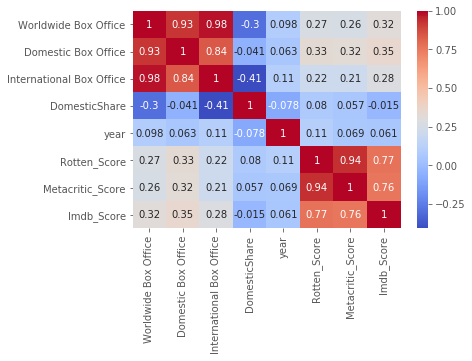

In [158]:
sns.heatmap(final_df.corr(),cmap='coolwarm',annot=True)

In [109]:
final_df.query('year==2009').corr()

,Worldwide Box Office,Domestic Box Office,International Box Office,DomesticShare,year,Rotten_Score,Metacritic_Score,Imdb_Score
Worldwide Box Office,1.000000,0.932366,0.987842,-0.270305,NaN,0.220879,0.310650,0.251166
Domestic Box Office,0.932366,1.000000,0.864828,-0.059903,NaN,0.252466,0.321775,0.286391
International Box Office,0.987842,0.864828,1.000000,-0.349636,NaN,0.198185,0.293054,0.225659
DomesticShare,-0.270305,-0.059903,-0.349636,1.000000,NaN,-0.056256,-0.119284,-0.026811
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rotten_Score,0.220879,0.252466,0.198185,-0.056256,NaN,1.000000,0.935559,0.792885
Metacritic_Score,0.310650,0.321775,0.293054,-0.119284,NaN,0.935559,1.000000,0.707811
Imdb_Score,0.251166,0.286391,0.225659,-0.026811,NaN,0.792885,0.707811,1.000000


In [110]:
final_df.query('year==2010').corr()

,Worldwide Box Office,Domestic Box Office,International Box Office,DomesticShare,year,Rotten_Score,Metacritic_Score,Imdb_Score
Worldwide Box Office,1.000000,0.945503,0.983404,-0.355615,NaN,0.262698,0.286472,0.291814
Domestic Box Office,0.945503,1.000000,0.870734,-0.115477,NaN,0.323224,0.339348,0.330444
International Box Office,0.983404,0.870734,1.000000,-0.472718,NaN,0.216637,0.243556,0.256586
DomesticShare,-0.355615,-0.115477,-0.472718,1.000000,NaN,0.057864,0.063171,0.006118
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rotten_Score,0.262698,0.323224,0.216637,0.057864,NaN,1.000000,0.956362,0.815525
Metacritic_Score,0.286472,0.339348,0.243556,0.063171,NaN,0.956362,1.000000,0.826054
Imdb_Score,0.291814,0.330444,0.256586,0.006118,NaN,0.815525,0.826054,1.000000


In [111]:
final_df.query('year==2011').corr()

,Worldwide Box Office,Domestic Box Office,International Box Office,DomesticShare,year,Rotten_Score,Metacritic_Score,Imdb_Score
Worldwide Box Office,1.000000,0.908119,0.984175,-0.333900,NaN,0.072877,0.031103,0.152244
Domestic Box Office,0.908119,1.000000,0.819554,-0.013031,NaN,0.171185,0.107244,0.182039
International Box Office,0.984175,0.819554,1.000000,-0.451424,NaN,0.027286,-0.002822,0.131306
DomesticShare,-0.333900,-0.013031,-0.451424,1.000000,NaN,0.171195,0.129707,-0.042387
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rotten_Score,0.072877,0.171185,0.027286,0.171195,NaN,1.000000,0.943400,0.708129
Metacritic_Score,0.031103,0.107244,-0.002822,0.129707,NaN,0.943400,1.000000,0.728092
Imdb_Score,0.152244,0.182039,0.131306,-0.042387,NaN,0.708129,0.728092,1.000000


In [112]:
final_df.query('year==2012').corr()

,Worldwide Box Office,Domestic Box Office,International Box Office,DomesticShare,year,Rotten_Score,Metacritic_Score,Imdb_Score
Worldwide Box Office,1.000000,0.908198,0.975585,-0.323056,NaN,0.322884,0.266883,0.455682
Domestic Box Office,0.908198,1.000000,0.794104,-0.006755,NaN,0.391502,0.337579,0.491655
International Box Office,0.975585,0.794104,1.000000,-0.465579,NaN,0.263441,0.210414,0.403730
DomesticShare,-0.323056,-0.006755,-0.465579,1.000000,NaN,0.043373,0.080071,0.003638
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rotten_Score,0.322884,0.391502,0.263441,0.043373,NaN,1.000000,0.929219,0.785146
Metacritic_Score,0.266883,0.337579,0.210414,0.080071,NaN,0.929219,1.000000,0.784614
Imdb_Score,0.455682,0.491655,0.403730,0.003638,NaN,0.785146,0.784614,1.000000


In [113]:
final_df.query('year==2013').corr()

,Worldwide Box Office,Domestic Box Office,International Box Office,DomesticShare,year,Rotten_Score,Metacritic_Score,Imdb_Score
Worldwide Box Office,1.000000,0.933724,0.982332,-0.268033,NaN,0.320347,0.281317,0.278520
Domestic Box Office,0.933724,1.000000,0.850230,0.012687,NaN,0.369451,0.316287,0.304916
International Box Office,0.982332,0.850230,1.000000,-0.400761,NaN,0.277917,0.248319,0.250150
DomesticShare,-0.268033,0.012687,-0.400761,1.000000,NaN,0.039971,-0.017171,-0.006120
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rotten_Score,0.320347,0.369451,0.277917,0.039971,NaN,1.000000,0.942494,0.789906
Metacritic_Score,0.281317,0.316287,0.248319,-0.017171,NaN,0.942494,1.000000,0.790590
Imdb_Score,0.278520,0.304916,0.250150,-0.006120,NaN,0.789906,0.790590,1.000000


In [114]:
final_df.query('year==2014').corr()

,Worldwide Box Office,Domestic Box Office,International Box Office,DomesticShare,year,Rotten_Score,Metacritic_Score,Imdb_Score
Worldwide Box Office,1.000000,0.869088,0.971650,-0.269388,NaN,0.351357,0.346877,0.374445
Domestic Box Office,0.869088,1.000000,0.727502,0.128749,NaN,0.408497,0.431129,0.419861
International Box Office,0.971650,0.727502,1.000000,-0.435185,NaN,0.292101,0.275071,0.318694
DomesticShare,-0.269388,0.128749,-0.435185,1.000000,NaN,0.006267,0.030587,0.014042
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rotten_Score,0.351357,0.408497,0.292101,0.006267,NaN,1.000000,0.943492,0.796227
Metacritic_Score,0.346877,0.431129,0.275071,0.030587,NaN,0.943492,1.000000,0.808252
Imdb_Score,0.374445,0.419861,0.318694,0.014042,NaN,0.796227,0.808252,1.000000


In [115]:
final_df.query('year==2015').corr()

,Worldwide Box Office,Domestic Box Office,International Box Office,DomesticShare,year,Rotten_Score,Metacritic_Score,Imdb_Score
Worldwide Box Office,1.000000,0.939812,0.987103,-0.250959,NaN,0.257091,0.243910,0.207904
Domestic Box Office,0.939812,1.000000,0.872991,-0.016019,NaN,0.313460,0.296530,0.242500
International Box Office,0.987103,0.872991,1.000000,-0.350719,NaN,0.220116,0.209233,0.183152
DomesticShare,-0.250959,-0.016019,-0.350719,1.000000,NaN,0.067326,0.031077,0.026151
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rotten_Score,0.257091,0.313460,0.220116,0.067326,NaN,1.000000,0.944112,0.811296
Metacritic_Score,0.243910,0.296530,0.209233,0.031077,NaN,0.944112,1.000000,0.782990
Imdb_Score,0.207904,0.242500,0.183152,0.026151,NaN,0.811296,0.782990,1.000000


In [116]:
final_df.query('year==2016').corr()

,Worldwide Box Office,Domestic Box Office,International Box Office,DomesticShare,year,Rotten_Score,Metacritic_Score,Imdb_Score
Worldwide Box Office,1.000000,0.938843,0.974423,-0.177078,NaN,0.319989,0.307738,0.403950
Domestic Box Office,0.938843,1.000000,0.837450,0.110283,NaN,0.412884,0.380618,0.457104
International Box Office,0.974423,0.837450,1.000000,-0.353015,NaN,0.238409,0.240023,0.342807
DomesticShare,-0.177078,0.110283,-0.353015,1.000000,NaN,0.314374,0.300338,0.178905
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rotten_Score,0.319989,0.412884,0.238409,0.314374,NaN,1.000000,0.947363,0.745981
Metacritic_Score,0.307738,0.380618,0.240023,0.300338,NaN,0.947363,1.000000,0.761277
Imdb_Score,0.403950,0.457104,0.342807,0.178905,NaN,0.745981,0.761277,1.000000


In [117]:
final_df.query('year==2017').corr()

,Worldwide Box Office,Domestic Box Office,International Box Office,DomesticShare,year,Rotten_Score,Metacritic_Score,Imdb_Score
Worldwide Box Office,1.000000,0.893509,0.975488,-0.354769,NaN,0.250185,0.187792,0.292767
Domestic Box Office,0.893509,1.000000,0.772794,-0.026681,NaN,0.382105,0.316601,0.384630
International Box Office,0.975488,0.772794,1.000000,-0.488336,NaN,0.166350,0.110268,0.225296
DomesticShare,-0.354769,-0.026681,-0.488336,1.000000,NaN,0.203519,0.198505,0.046218
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rotten_Score,0.250185,0.382105,0.166350,0.203519,NaN,1.000000,0.937995,0.810171
Metacritic_Score,0.187792,0.316601,0.110268,0.198505,NaN,0.937995,1.000000,0.824891
Imdb_Score,0.292767,0.384630,0.225296,0.046218,NaN,0.810171,0.824891,1.000000


In [118]:
final_df.query('year==2018').corr()

,Worldwide Box Office,Domestic Box Office,International Box Office,DomesticShare,year,Rotten_Score,Metacritic_Score,Imdb_Score
Worldwide Box Office,1.000000,0.935041,0.979285,-0.272280,NaN,0.262663,0.220687,0.381717
Domestic Box Office,0.935041,1.000000,0.843882,-0.024389,NaN,0.367605,0.351232,0.401061
International Box Office,0.979285,0.843882,1.000000,-0.398116,NaN,0.187542,0.133371,0.348600
DomesticShare,-0.272280,-0.024389,-0.398116,1.000000,NaN,0.198658,0.154027,0.041909
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rotten_Score,0.262663,0.367605,0.187542,0.198658,NaN,1.000000,0.888959,0.785746
Metacritic_Score,0.220687,0.351232,0.133371,0.154027,NaN,0.888959,1.000000,0.671933
Imdb_Score,0.381717,0.401061,0.348600,0.041909,NaN,0.785746,0.671933,1.000000


In [119]:
final_df.query('year==2019').corr()

,Worldwide Box Office,Domestic Box Office,International Box Office,DomesticShare,year,Rotten_Score,Metacritic_Score,Imdb_Score
Worldwide Box Office,1.000000,0.984934,0.996796,-0.387230,NaN,0.312645,0.441819,0.536064
Domestic Box Office,0.984934,1.000000,0.967947,-0.310415,NaN,0.361540,0.497744,0.549344
International Box Office,0.996796,0.967947,1.000000,-0.418818,NaN,0.286851,0.411460,0.524470
DomesticShare,-0.387230,-0.310415,-0.418818,1.000000,NaN,0.079685,-0.005760,-0.229267
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rotten_Score,0.312645,0.361540,0.286851,0.079685,NaN,1.000000,0.945314,0.668269
Metacritic_Score,0.441819,0.497744,0.411460,-0.005760,NaN,0.945314,1.000000,0.699735
Imdb_Score,0.536064,0.549344,0.524470,-0.229267,NaN,0.668269,0.699735,1.000000


In [48]:
final_df['Worldwide Box Office'].mean()

281204627.28230864

In [49]:
final_df['Domestic Box Office'].mean()

108718815.21455458

In [50]:
final_df['International Box Office'].mean()

172485812.0677541

In [55]:
final_df['Rotten_Score'].mean()

55.59723964868256

In [56]:
final_df['Imdb_Score'].mean()

65.27603513174404

In [57]:
final_df['Metacritic_Score'].mean()

54.429109159347554

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cf067b550>,
      dtype=object)

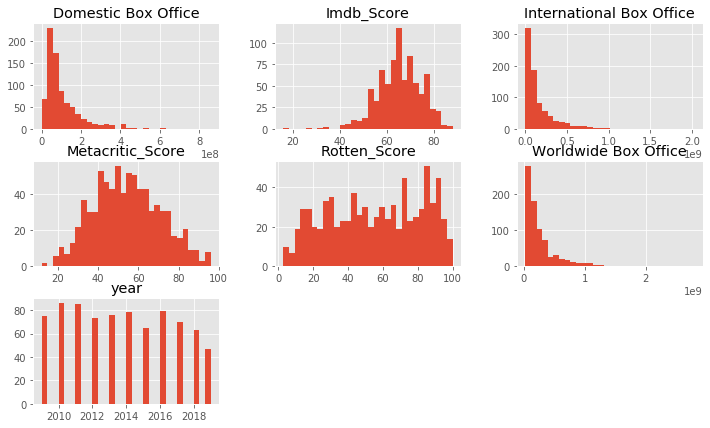

In [54]:
final_df.hist(figsize=(12,7),bins=30)

In [74]:
from collections import OrderedDict
def break_into_years(dataframe):
    years_dict = OrderedDict()
    for year in range(2009,2020):
        key = 'year' + str(year)
        years_dict[key] = final_df[final_df['year']==year]
    return years_dict

In [99]:
final_df.query('year==2009')
year2009 = final_df[final_df['year']==2009]
years = {x : final_df[final_df['year']==x] for x in range(2009, 2020)}

In [204]:
grouped = final_df.groupby('year')

In [75]:
years_split = break_into_years(final_df)

In [77]:
years_split['year2009']

,Worldwide Box Office,Domestic Box Office,International Box Office,DomesticShare,year,Rotten_Score,Metacritic_Score,Imdb_Score
clean_movie,,,,,,,,
Avatar,2789705275,760507625,2029197650,27.26%,2009,82.0,83.0,78.0
Harry Potter and the Half-Blood Prince,935213767,302089278,633124489,32.30%,2009,83.0,78.0,76.0
Ice Age: Dawn of the Dinosaurs,859701857,196573705,663128152,22.87%,2009,46.0,50.0,69.0
Transformers: Revenge of the Fallen,836519699,402111870,434407829,48.07%,2009,20.0,35.0,60.0
2012,757677748,166112167,591565581,21.92%,2009,39.0,49.0,58.0
Up,731463377,293004164,438459213,40.06%,2009,98.0,88.0,82.0
The Twilight Saga: New Moon,687557727,296623634,390934093,43.14%,2009,28.0,44.0,47.0
Sherlock Holmes,498438212,209028679,289409533,41.94%,2009,69.0,57.0,76.0
The Hangover,465764086,277322503,188441583,59.54%,2009,78.0,73.0,77.0


In [128]:
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2 as chisqr
from scipy import stats as stats
linreg = LinearRegression()

In [142]:
import statsmodels.api as sm

In [219]:
X = final_df['Imdb_Score']
y = final_df['Worldwide Box Office']
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Worldwide Box Office   R-squared (uncentered):                  -8.116
Model:                              OLS   Adj. R-squared (uncentered):             -8.127
Method:                   Least Squares   F-statistic:                             -708.7
Date:                  Wed, 11 Sep 2019   Prob (F-statistic):                        1.00
Time:                          16:08:32   Log-Likelihood:                         -16671.
No. Observations:                   797   AIC:                                  3.334e+04
Df Residuals:                       796   BIC:                                  3.335e+04
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Imdb_Score  4.428e+06   1.58e+05     28.049      0.000    4.12e+06    4.74e+06
==============================================================================
Omnibus:                      564.840   Durbin-Watson:                   0.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8692.973
Skew:                           3.068   Prob(JB):                         0.00
Kurtosis:                      17.971   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
y = final_df['Imdb_Score'].values.reshape(-1, 1) 
x = final_df['Worldwide Box Office'].values.reshape(-1, 1) 
linreg.fit(x,y)  
y_pred = linreg.predict(x)  
linreg.score(x,y)

0.10050915958474915

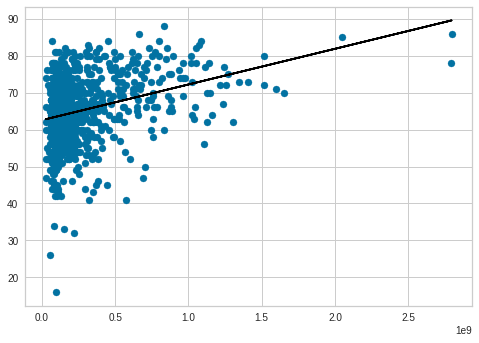

In [221]:
fig,ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, y_pred, color='black')
x_label = 'Imdb Ratings Score'

In [222]:
y = final_df['Rotten_Score'].values.reshape(-1, 1) 
x = final_df['Worldwide Box Office'].values.reshape(-1, 1) 
linreg.fit(x,y)  
y_pred = linreg.predict(x)  
linreg.score(x,y)

0.07057398877046972

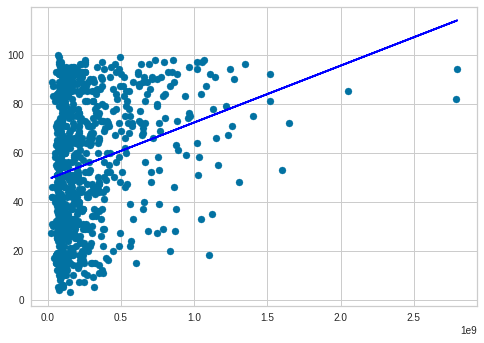

In [223]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='blue')

In [224]:
y = final_df['Metacritic_Score'].values.reshape(-1, 1) 
x = final_df['Worldwide Box Office'].values.reshape(-1, 1) 
linreg.fit(x,y)  
y_pred = linreg.predict(x)  
linreg.score(x,y)

0.06753353240875681

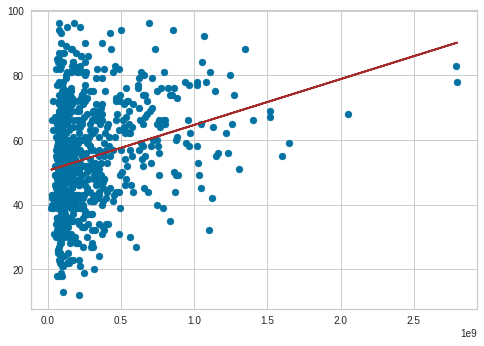

In [225]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='brown')

In [244]:
X = final_df[['Rotten_Score','Metacritic_Score','Imdb_Score']]
y = final_df['Worldwide Box Office']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)
from sklearn.metrics import mean_squared_error, r2_score

In [247]:
reg = LinearRegression()
reg.fit(X_train[['Rotten_Score','Metacritic_Score','Imdb_Score']], y_train)
y_predicted = reg.predict(X_test[['Rotten_Score','Metacritic_Score','Imdb_Score']])
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean squared error: 74015874495415536.00
R²: 0.04
Root Mean Squared Error: 272058586.5129339


In [236]:
y = final_df[['Metacritic_Score','Rotten_Score','Imdb_Score']].values.reshape(-1,1)
x = final_df['Worldwide Box Office'].values.reshape(-1,1)
linreg.fit(x,y)  
y_pred = linreg.predict(x)  
linreg.score(x,y)

0.03477060682089628

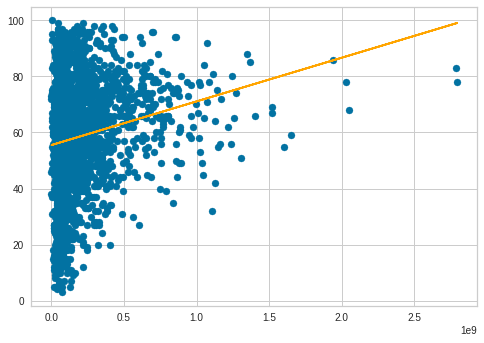

In [237]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='orange')

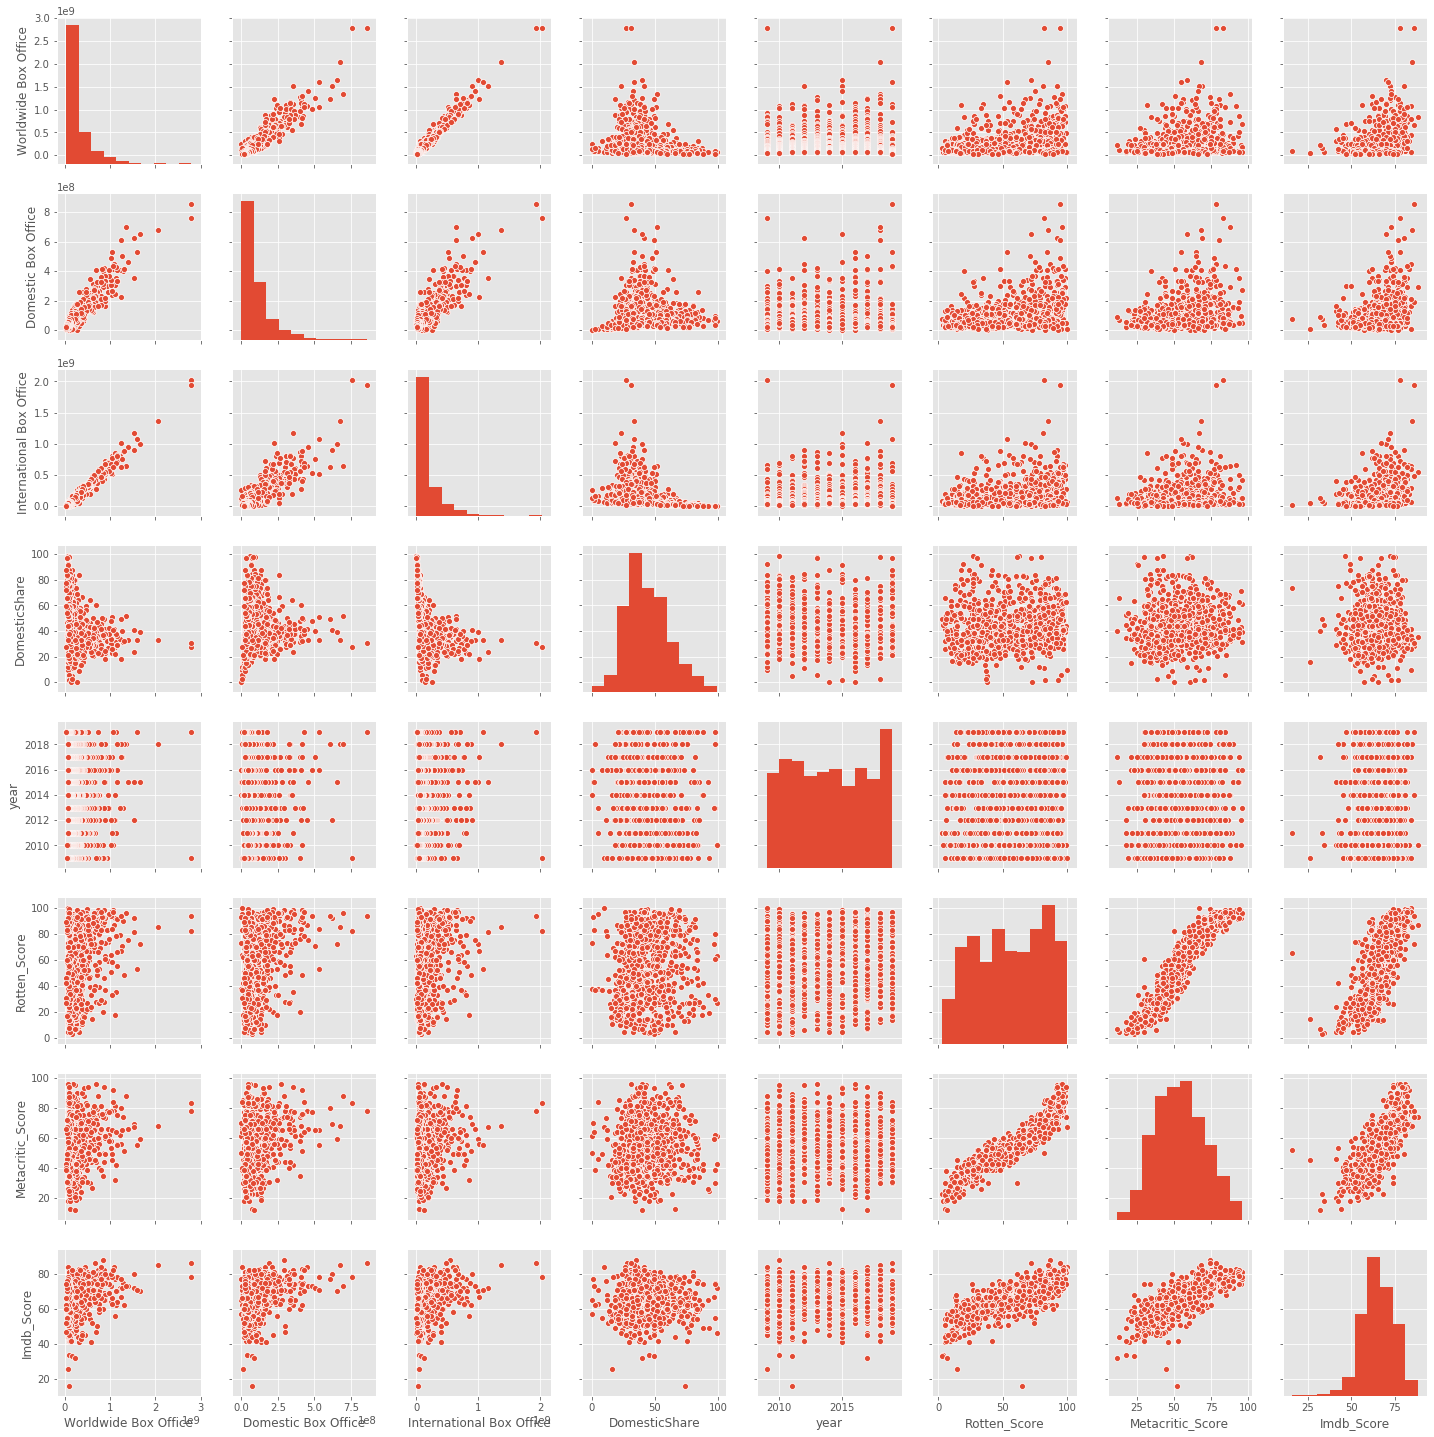

In [147]:
import seaborn as sns
sns.pairplot(final_df)

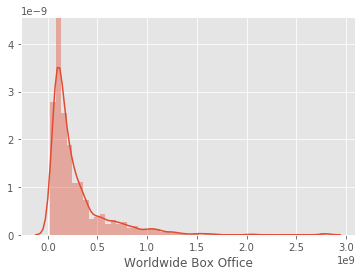

In [203]:
sns.distplot(final_df['Worldwide Box Office'])

In [163]:
Y = final_df['Worldwide Box Office'].values.reshape(-1, 1) 
X = final_df['Imdb_Score'].values.reshape(-1, 1) 

In [165]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=10)

In [196]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [212]:
pred = linreg.predict(X_test)

In [205]:
print(linreg.coef_)

[[10968917.78245148]]


In [206]:
print(linreg.intercept_)

[-4.37769198e+08]


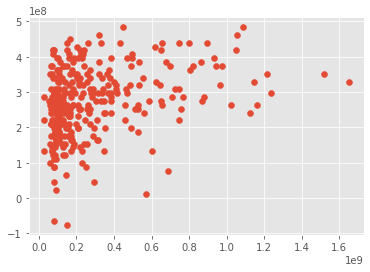

In [198]:
plt.scatter(y_test,pred)


In [201]:
import numpy as np
from sklearn import metrics

In [202]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 185022622.61864415
Mean Squared Error: 6.763330720060035e+16
Root Mean Squared Error: 260064044.42098555


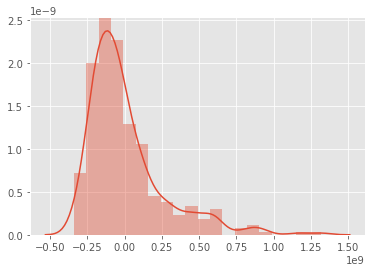

In [213]:
sns.distplot((y_test - pred), bins=20)

In [214]:
from sklearn.metrics import classification_report

In [215]:
print(classification_report(y_test,y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

/home/colin/anaconda3/lib/python3.7/site-packages/yellowbrick/regressor/influence.py:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  self.distance_, linefmt=self.linefmt, markerfmt=self.markerfmt


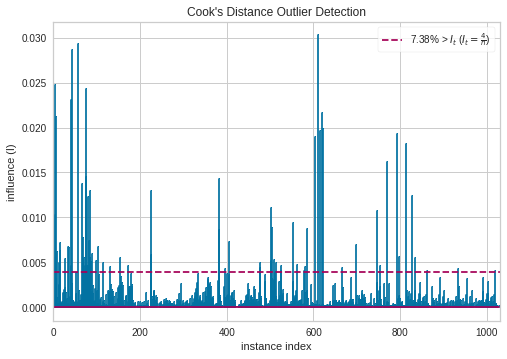

In [218]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete
X, y = load_concrete()
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.poof()

In [248]:
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [255]:
mean = final_df['Imdb_Score'].mean()
stdev = final_df['Imdb_Score'].std()
print(mean, stdev)

65.27603513174404 9.265301907436704


In [254]:
population = np.random.normal(loc=mean, scale=stdev, size=50000)
# take 1k 'samples' from the larger population
samples = population[:1000]
print(bs.bootstrap(samples, stat_func=bs_stats.mean))
# >> 100.08  (99.46, 100.69)
print(bs.bootstrap(samples, stat_func=bs_stats.std))
# >> 9.49  (9.92, 10.36)

65.76803130866375    (65.17890795083818, 66.36148478648573)
9.453626479764582    (9.047646071349739, 9.874667692802204)
